In [1]:
%load_ext autoreload
%autoreload 2

from ETL import *
from yahist import Hist1D

from yahist.fit import fit_hist
from yahist.utils import ignore_division_errors
import scipy
import os
import mplhep as hep
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style
from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
style.use('seaborn-white')

In [2]:
sens = Sensor2(height=21.4,width=21.6)
sens.setActiveArea()

In [3]:
sens.outline

[[-10.7, 10.8], [10.7, 10.8], [10.7, -10.8], [-10.7, -10.8]]

In [4]:
sens.activeArea

[[-10.399999999999999, 10.5],
 [10.399999999999999, 10.5],
 [10.399999999999999, -10.3],
 [-10.399999999999999, -10.3]]

In [5]:
sens.get_pixel_centers(m=16,n=16,gap=0.05)
sens.getPixelsOutline()

In [6]:
sens.__dict__.keys()

dict_keys(['height', 'width', 'x', 'y', 'color', 'deadspace1', 'deadspace2', 'x1', 'x2', 'y1', 'y2', 'outline', 'ax1', 'ax2', 'ay1', 'ay2', 'activeArea', 'n_pixels', 'x_pixel_size', 'y_pixel_size', 'x0', 'y0', 'centers_new_system', 'centers_pixels', 'pixels'])

In [7]:
sens.y_pixel_size

1.253125

In [8]:
sens.pixels

c:\Users\ymehr\OneDrive\Desktop\golf project\ETL-SH-Design-1\ETL.py:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return plt.Polygon(self.outline, color='blue', closed=True, edgecolor='black', alpha=0.6)


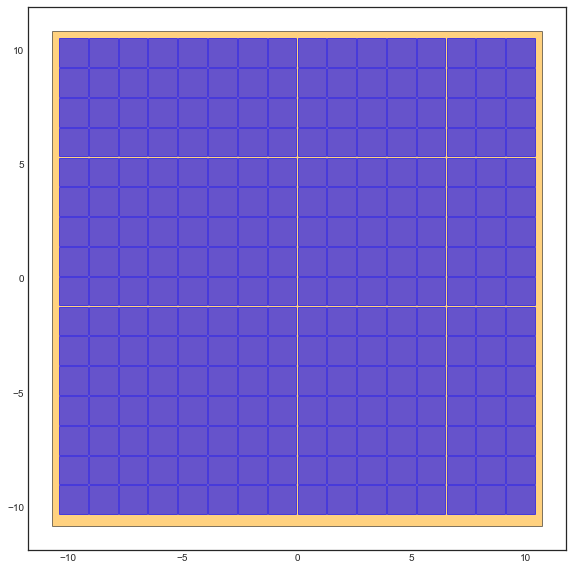

In [9]:
plt.rcParams['figure.figsize'] = [10, 10]
pm = sens.getPolygon()
plt.gca().add_patch(pm)

for pix in sens.pixels:
    plt.gca().add_patch(pix.getPolygon())

plt.axis('scaled')
plt.savefig('sensor.png')

In [10]:
(16-1)*0.05*sens.y_pixel_size*16 + (16-1)*0.05*sens.x_pixel_size*16

30.075

In [11]:
(445.2-30.5)/445.2

0.9314914645103324

In [12]:
(922.14-50)/922.14

0.945778298306114

In [14]:
with open('new_layouts/database_new_filled.yaml') as f:
    database_new = load(f, Loader=Loader)

disk_new = database_new['new'] 

In [15]:
s = Sensor2(21.4, 21.6)

dee = Dee(315, 1185)
dee.fromCenters2(disk_new['disk1']['front'], s, 16, 16, 0.05)

c:\Users\ymehr\OneDrive\Desktop\golf project\ETL-SH-Design-1\ETL.py:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return plt.Polygon(self.outline, color='blue', closed=True, edgecolor='black', alpha=0.6)


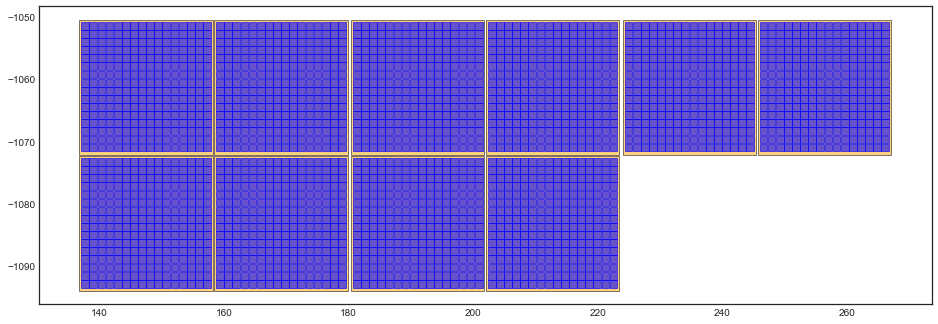

In [17]:
plt.rcParams['figure.figsize'] = [16, 16]

i = 0
for sen in dee.sensors:
    pm = sen.getPolygon()
    plt.gca().add_patch(pm)

    for pix in sen.pixels:
        plt.gca().add_patch(pix.getPolygon())
    
    i += 1
    if i == 10:
        break

plt.axis('scaled')
plt.savefig('a')

In [ ]:
from tqdm import tqdm as loader

In [ ]:
for i in loader(range(10)):
    print(i)

100%|██████████| 10/10 [00:00<00:00, 5003.94it/s]

0
1
2
3
4
5
6
7
8
9
